<a href="https://colab.research.google.com/github/bharatbs13/AIML/blob/master/mf_portfolio_xirr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initliazation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyxirr

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
from pyxirr import xirr
from scipy.optimize import newton
import matplotlib.pyplot as plt
from datetime import datetime


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls /content/drive/MyDrive/mf_html/*.html | wc -l

ls: cannot access '/content/drive/MyDrive/mf_html/*.html': No such file or directory
0


In [ ]:
#save_path = '/content/drive/MyDrive/mf_data'
input_path = '/content/drive/MyDrive/mf_output'




In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.6 MB/s eta 0:00:00
time: 424 µs (started: 2024-02-01 15:44:37 +00:00)


In [ ]:
!pip install mftool

In [ ]:
from mftool import Mftool
mf = Mftool()
#hist = mf.get_scheme_historical_nav_for_dates(str(s.returned_code), past_date, current_date)
#data = pd.DataFrame(hist['data'])
#data['date']= pd.to_datetime(data['date'])
#data.sort_values(by='date', inplace=True)



In [ ]:
d1 = {'LargeCapIndex' : 'LargeCap',
      'SmallCapIndex': 'SmallCap',
      'MidCapIndex' : 'MidCap',
      'InternationalEquityETF_Fof': 'InternationalEq',
      'InternationalEquityETF' : 'InternationalEq',
      'InternationalEquityFof' : 'InternationalEq',
      'InternationalFunds' : 'InternationalEq',
      'EquityETF_Fof' : 'MultiCap',
      'MidCapETF': 'MidCap',
      'LargeCapETF' : 'LargeCap',
      'EquityFof' : 'MultiCap',
      'ContraFunds' : 'Contra',
      'MidCap' : 'MidCap',
      'InternationalLargeCap': 'InternationalEq',
      'SmallCap' : 'SmallCap',
      'AggressiveHybrid' : 'AggressiveHybrid',
      'gold': 'gold',
      'debt': 'debt',
      'FocusedFunds' : 'fundamental',
      'ValueOriented' : 'fundamental',
      'LargeCap' : 'LargeCap',
      'FlexiCaps' : 'FlexiCaps',
      'MultiCap' : 'MultiCap',
      'LargeMidCap' : 'MultiCap',
      'FlexiCaps': 'FlexiCaps',
      'SilverETF_Fof': 'silver',
      'SilverETF': 'silver',
      'GsecETF': 'debt',
      'DebtFof' : 'debt',
      'GoldETF' : 'gold',
      'HybridFof' : 'hybrid',
      'SectoralPharma' : 'sectoral',
      'SectoralBanking': 'sectoral',
      'SectoralTechnology' : 'sectoral',
      'hybrid': 'hybrid'}
d2 = {'LargeCap' : 'Equity', 'SmallCap': 'Equity', 'MidCap': 'Equity', 'InternationalEq' : 'Equity', 'ETFs' : 'Equity', 'MultiCap': 'Equity',\
      'Contra' : 'Equity', 'AggressiveHybrid':'Hybrid', 'gold': 'gold', 'debt': 'debt', 'silver': 'silver',\
      'fundamental' : 'Equity', 'FlexiCaps': 'Equity', 'hybrid': 'Equity', 'sectoral': 'Equity'}

In [ ]:
import os
from datetime import datetime


In [ ]:
def get_latest_transaction_file():
  files = []
  for file_path in os.listdir(input_path):
      # check if current file_path is a file
      if os.path.isfile(os.path.join(input_path, file_path)):
          # add filename to list
          files.append(file_path)
  #print(files)
  mfiles = [s for s in files if "MfTransactions_" in s]
  print(mfiles)
  mfiles = [s for s in files if "MfTransactions_" in s]
  L1 = [f.split("MfTransactions_")[1] for f in mfiles]
  L2 = [l.replace('.csv', '') for l in L1]
  myList = list(filter(None, L2))
  dates = list(filter(None, myList))
  #print(L1)
  #print(L2)
  print(dates)
  dates_dt = [datetime.strptime(x, "%Y_%m_%d") for x in dates]
  latest_dt = max(dates_dt)
  print(f'latest date : {latest_dt}')
  latest_file = f'{input_path}/MfTransactions_{latest_dt.strftime("%Y_%m_%d")}.csv'
  #print(latest_file)
  return latest_file


## XIRR

In [ ]:
latest_file= get_latest_transaction_file()
print(latest_file)
df = pd.read_csv(latest_file)

['MfTransactions_2024_01_23.csv']
['2024_01_23']
latest date : 2024-01-23 00:00:00
/content/drive/MyDrive/mf_output/MfTransactions_2024_01_23.csv


In [ ]:
df.head(10)

,codes,amc,isin,Type_L1,Action,Fund,max_days,sm_sharpe,sm_sortino,sm_cagr,...,Type_L3,overall_sharpe,overall_sortino,overall_cagr,norm_overall_sharpe,norm_overall_sortino,norm_overall_cagr,NormScore,RecommededAmount,verified
0,148703,UTI,INF789F1AUT5,LargeCapIndex,credit,uti nifty 200 momentum 30 index fund,240.0,0.49,0.50,22.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,149800,Motilal Oswal,INF247L01AV1,LargeCapIndex,credit,motilal oswal nifty 200 momentum 30 index fund,240.0,0.48,0.49,21.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,150487,Nippon India,INF204KC1584,LargeCapIndex,credit,nippon india nifty alpha low volatility 30 ind...,240.0,0.47,0.46,25.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,149881,UTI,INF789F1AVF2,LargeCapIndex,credit,uti s&p bse low volatility index fund,240.0,0.46,0.45,23.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149919,Motilal Oswal,INF247L01AY5,LargeCapIndex,credit,motilal oswal s&p bse low volatility index fund,240.0,0.45,0.45,22.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,141877,DSP,INF740KA1CR7,LargeCapIndex,credit,dsp nifty 50 equal weight index fund,240.0,0.43,0.46,21.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,149107,HDFC,INF179KC1BM8,LargeCapIndex,credit,hdfc nifty50 equal weight index fund,240.0,0.43,0.46,21.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,150452,ICICI Prudential,INF109KC11D8,LargeCapIndex,credit,icici prudential nifty 200 momentum 30 index fund,240.0,0.47,0.48,20.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,150677,SBI,INF200KA16P2,SmallCapIndex,credit,sbi nifty smallcap 250 index fund direct pla...,240.0,3.16,4.35,76.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,150892,Edelweiss,INF754K01QT8,SmallCapIndex,credit,edelweiss nifty smallcap 250 index fund dire...,240.0,3.56,5.06,83.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df = df[df.platform == 'et']

In [ ]:
cols = ['codes', 'isin', 'Fund', 'Type_L1', 'Type_L2', 'Type_L3', 'Action', 'quantity', 'InvestedAmount', 'Date']

In [ ]:

df['Type_L2'] = df.Type_L1.apply(lambda x : d1[x])
df['Type_L3'] = df['Type_L2'].apply(lambda x : d2[x])


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
df = df[cols]


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [ ]:
df.head()

,codes,isin,Fund,Type_L1,Type_L2,Type_L3,Action,quantity,InvestedAmount,Date
0,148703,INF789F1AUT5,uti nifty 200 momentum 30 index fund,LargeCapIndex,LargeCap,Equity,credit,2954.586,45000.0,2023-08-25
1,149800,INF247L01AV1,motilal oswal nifty 200 momentum 30 index fund,LargeCapIndex,LargeCap,Equity,credit,3529.491,39000.0,2023-08-25
2,150487,INF204KC1584,nippon india nifty alpha low volatility 30 ind...,LargeCapIndex,LargeCap,Equity,credit,2928.868,34000.0,2023-08-25
3,149881,INF789F1AVF2,uti s&p bse low volatility index fund,LargeCapIndex,LargeCap,Equity,credit,1498.986,19000.0,2023-08-25
4,149919,INF247L01AY5,motilal oswal s&p bse low volatility index fund,LargeCapIndex,LargeCap,Equity,credit,1110.280,14000.0,2023-08-25


In [ ]:
df.sort_values(by='Date', inplace=True)

In [ ]:
df

,codes,isin,Fund,Type_L1,Type_L2,Type_L3,Action,quantity,InvestedAmount,Date
63,120828,INF966L01689,quant small cap fund direct plan growth,SmallCap,SmallCap,Equity,credit,438.057,60000.0,2022-03-24
62,125307,INF663L01DV3,PGIM India Midcap Opportunities Fund - Direct ...,MidCap,MidCap,Equity,credit,1080.560,50000.0,2022-03-24
61,120841,INF966L01887,quant mid cap fund direct growth,MidCap,MidCap,Equity,credit,421.119,60000.0,2022-10-25
60,127042,INF247L01445,Motilal Oswal Midcap Fund - Growth,MidCap,MidCap,Equity,credit,347.395,20000.0,2022-10-25
59,146130,INF760K01JC6,Canara Robeco Small Cap Fund - Regular Plan - ...,SmallCap,SmallCap,Equity,credit,1849.020,50000.0,2022-12-15
...,...,...,...,...,...,...,...,...,...,...
92,139496,INF204KB1882,nippon india etf nifty 8 13 yr g sec long term...,GsecETF,debt,debt,credit,330.000,8233.0,2024-01-19
94,148800,INF204KC1030,nippon india etf nifty 5 yr benchmark g sec,GsecETF,debt,debt,credit,137.000,7473.0,2024-01-19
85,150517,INF247L01BE5,motilal oswal sp bse enhanced value etf,LargeCapETF,LargeCap,Equity,credit,183.000,15152.0,2024-01-19
89,149961,INF247L01BF2,invesco india invesco eqqq nasdaq 100 etf fo...,InternationalEquityETF_Fof,InternationalEq,Equity,credit,1128.187,14875.0,2024-01-19


In [ ]:
df['cashflow'] = np.where(df['Action']=='credit',   df['InvestedAmount']*-1, df['InvestedAmount'])

df['quantity'] = np.where(df['Action']=='debit',   df['quantity']*-1, df['quantity'])



In [ ]:
df[df.Action=='credit'].head()

,codes,isin,Fund,Type_L1,Type_L2,Type_L3,Action,quantity,InvestedAmount,Date,cashflow
63,120828,INF966L01689,quant small cap fund direct plan growth,SmallCap,SmallCap,Equity,credit,438.057,60000.0,2022-03-24,-60000.0
62,125307,INF663L01DV3,PGIM India Midcap Opportunities Fund - Direct ...,MidCap,MidCap,Equity,credit,1080.560,50000.0,2022-03-24,-50000.0
61,120841,INF966L01887,quant mid cap fund direct growth,MidCap,MidCap,Equity,credit,421.119,60000.0,2022-10-25,-60000.0
60,127042,INF247L01445,Motilal Oswal Midcap Fund - Growth,MidCap,MidCap,Equity,credit,347.395,20000.0,2022-10-25,-20000.0
59,146130,INF760K01JC6,Canara Robeco Small Cap Fund - Regular Plan - ...,SmallCap,SmallCap,Equity,credit,1849.020,50000.0,2022-12-15,-50000.0


In [ ]:
df[df.Action=='debit'].head()

,codes,isin,Fund,Type_L1,Type_L2,Type_L3,Action,quantity,InvestedAmount,Date,cashflow
49,147445,NaN,Mirae Asset Midcap Fund - Direct Plan - Growth,MidCap,MidCap,Equity,debit,-1343.550,31430.00,2023-06-06,31430.00
50,120819,NaN,quant absolute fund direct growth,AggressiveHybrid,AggressiveHybrid,Hybrid,debit,-121.665,38970.00,2023-06-06,38970.00
40,125307,INF663L01DV3,PGIM India Midcap Opportunities Fund - Direct ...,MidCap,MidCap,Equity,debit,-1080.560,56955.75,2023-07-03,56955.75


In [ ]:
df[df.Action=='credit'].shape

(93, 11)

In [ ]:
df[df.Action=='debit'].shape

(3, 11)

In [ ]:
df_nav = df.groupby(['codes']).quantity.sum().to_frame('quantity_avl').reset_index()

In [ ]:
df_nav.shape

(68, 2)

In [ ]:
df_nav.columns

Index(['codes', 'quantity_avl'], dtype='object')

In [ ]:
df_nav

,codes,quantity_avl
0,118481,89.758
1,118494,24.003
2,118778,343.693
3,118784,51.117
4,119716,107.767
...,...,...
63,151604,117.000
64,151649,1376.207
65,151724,1376.593
66,151727,1358.080


In [ ]:
mf.get_scheme_quote(str(118481))['nav']

'143.437'

time: 16.6 s (started: 2024-02-01 15:44:47 +00:00)


In [ ]:
df_nav['current_nav'] = df_nav.apply(lambda x: float(mf.get_scheme_quote(str(int(x['codes'])))['nav'])  if x['quantity_avl']>0 else None,  axis=1)


time: 12min 37s (started: 2024-02-01 15:45:57 +00:00)


In [ ]:
df_nav.head(10)

,codes,quantity_avl,current_nav
0,118481,89.758,143.4370
1,118494,24.003,676.8205
2,118778,343.693,159.0275
3,118784,51.117,202.9166
4,119716,107.767,218.0401
5,119835,1487.033,351.8059
6,120313,268.244,57.7540
7,120323,37.814,414.9800
8,120486,166.848,95.7669
9,120679,153.969,109.7814


time: 22.4 ms (started: 2024-02-01 16:05:25 +00:00)


In [ ]:
df_nav = pd.merge(df_nav, df[['codes', 'Type_L1', 'Type_L2', 'Type_L3']], on=['codes'], how='outer')

In [ ]:
df_nav.drop_duplicates(inplace=True)

time: 3.78 ms (started: 2024-02-01 16:05:33 +00:00)


In [ ]:
df_nav.shape

(70, 6)

time: 3.19 ms (started: 2024-02-01 16:05:35 +00:00)


In [ ]:
df_nav['current_val'] = df_nav['quantity_avl'] * df_nav['current_nav']

time: 2.18 ms (started: 2024-02-01 16:05:37 +00:00)


In [ ]:
df_nav.columns

Index(['codes', 'quantity_avl', 'current_nav', 'Type_L1', 'Type_L2', 'Type_L3',
       'current_val'],
      dtype='object')

time: 4.17 ms (started: 2024-02-01 16:05:39 +00:00)


In [ ]:
df_nav.head(10)

,codes,quantity_avl,current_nav,Type_L1,Type_L2,Type_L3,current_val
0,118481,89.758,143.4370,ValueOriented,fundamental,Equity,12874.618246
1,118494,24.003,676.8205,ValueOriented,fundamental,Equity,16245.722462
2,118778,343.693,159.0275,SmallCap,SmallCap,Equity,54656.638557
3,118784,51.117,202.9166,ValueOriented,fundamental,Equity,10372.487842
4,119716,107.767,218.0401,MidCap,MidCap,Equity,23497.527457
5,119835,1487.033,351.8059,ContraFunds,Contra,Equity,523146.982895
11,120313,268.244,57.7540,HybridFof,hybrid,Equity,15492.163976
12,120323,37.814,414.9800,ValueOriented,fundamental,Equity,15692.053720
13,120486,166.848,95.7669,ValueOriented,fundamental,Equity,15978.515731
14,120679,153.969,109.7814,HybridFof,hybrid,Equity,16902.932377


time: 26 ms (started: 2024-02-01 16:05:42 +00:00)


In [ ]:
today_protfolio_val = round(df_nav.current_val.sum())
today_protfolio_val

3524542

time: 5.3 ms (started: 2024-02-01 16:05:45 +00:00)


In [ ]:
dtype_dict = {'codes': int, 'quantity': float, 'InvestedAmount': float, 'cashflow': float, 'isin': str, 'Type_L1': 'category', 'Action':  'category'}
df = df.astype(dtype_dict)

time: 40.4 ms (started: 2024-02-01 16:05:58 +00:00)


In [ ]:
s1 = df.Date.append(pd.to_datetime(pd.Series(datetime.today().strftime('%Y-%m-%d')))).reset_index(drop=True)
s1

0    2022-03-24
1    2022-03-24
2    2022-10-25
3    2022-10-25
4    2022-12-15
        ...    
92   2024-01-19
93   2024-01-19
94   2024-01-19
95   2024-01-19
96   2024-02-01
Length: 97, dtype: datetime64[ns]

time: 12.6 ms (started: 2024-02-01 16:06:03 +00:00)


In [ ]:
s2 = df.cashflow.append(pd.Series(today_protfolio_val)).reset_index(drop=True)
s2

0      -60000.0
1      -50000.0
2      -60000.0
3      -20000.0
4      -50000.0
        ...    
92      -7473.0
93     -15152.0
94     -14875.0
95     -15132.0
96    3524542.0
Length: 97, dtype: float64

time: 14.3 ms (started: 2024-02-01 16:06:06 +00:00)


In [ ]:
s2[s2.values > 0]

13      31430.00
14      38970.00
23      56955.75
96    3524542.00
dtype: float64

time: 6.81 ms (started: 2024-02-01 16:06:08 +00:00)


In [ ]:
#days_elapsed = [(dt-dates[0])/np.timedelta64(1, 'D') for dt in dates]
#np.array(days_elapsed)

In [ ]:
overall_xirr = round(xirr(s1,s2), 2)
t1 = s1[0].to_pydatetime().strftime("%d-%m-%Y")
t2 = s1.iloc[-1].to_pydatetime().strftime("%d-%m-%Y")
m = np.round((s1.iloc[-1] - s1[0]) / np.timedelta64(1, 'M'))
print(f"over all xirr is : {overall_xirr*100} % in last {m} months from date {t1} to date {t2}")

over all xirr is : 72.0 % in last 22.0 months from date 24-03-2022 to date 01-02-2024
time: 4.08 ms (started: 2024-02-01 16:06:11 +00:00)


In [ ]:
'''
def getXIRR(rate) :
    npv =  sum([cf/(1+rate)**(days/365) for days, cf in zip(df1.days_elapsed, df1.cashflow)])
    return npv

newton_rate= newton(getXIRR,.02)
round(newton_rate, 2)
'''

'\ndef getXIRR(rate) :\n    npv =  sum([cf/(1+rate)**(days/365) for days, cf in zip(df1.days_elapsed, df1.cashflow)])\n    return npv\n\nnewton_rate= newton(getXIRR,.02)\nround(newton_rate, 2)\n'

In [ ]:
#Individual fund wise XIRR
xirrs = []
today_date = pd.to_datetime(pd.Series(datetime.today().strftime('%Y-%m-%d')))
codes = df.codes.unique()
very_first_dates = []
selected_codes = []
for code in codes:
  df1 = df[df.codes==code]
  df1_nav = df_nav[df_nav.codes==code]
  #print(df1_nav)
  today_code_val = round(df1_nav.current_val.sum())
  if today_code_val > 0:
    s1 = df1.Date.append(today_date).reset_index(drop=True)
    s2 = df1.cashflow.append(pd.Series(today_code_val)).reset_index(drop=True)
    xirrs.append(round(xirr(s1,s2), 2))
    very_first_dates.append(df1.Date.iloc[0])
    selected_codes.append(code)
  else:
    print(f'code {code} is redemmed fully')





code 125307 is redemmed fully
code 147445 is redemmed fully
code 120819 is redemmed fully
time: 253 ms (started: 2024-02-01 16:06:38 +00:00)


In [ ]:
df_xirrs=pd.DataFrame(zip(selected_codes, xirrs, very_first_dates), columns = ['codes', 'xirr', 'start_date'])



time: 3.67 ms (started: 2024-02-01 16:09:38 +00:00)


In [ ]:
df_xirrs['xirr_date'] = pd.to_datetime(pd.Series(datetime.today().strftime('%Y-%m-%d'))[0])


time: 2.86 ms (started: 2024-02-01 16:09:41 +00:00)


In [ ]:
df_xirrs.dtypes

codes                  int64
xirr                 float64
start_date    datetime64[ns]
xirr_date     datetime64[ns]
dtype: object

time: 5.43 ms (started: 2024-02-01 16:09:42 +00:00)


In [ ]:
df_xirrs['fund_age_months'] = ((df_xirrs.xirr_date - df_xirrs.start_date)/np.timedelta64(1, 'M')).astype(int)


time: 3.37 ms (started: 2024-02-01 16:09:46 +00:00)


In [ ]:
df_xirrs.sort_values(by='xirr', ascending=False, inplace=True)

time: 2.3 ms (started: 2024-02-01 16:09:47 +00:00)


In [ ]:
df_xirrs[df_xirrs.fund_age_months > 3]

,codes,xirr,start_date,xirr_date,fund_age_months
26,148815,1.00,2023-09-21,2024-02-01,4
24,148519,0.86,2023-09-21,2024-02-01,4
15,149800,0.84,2023-08-25,2024-02-01,5
22,150677,0.84,2023-09-21,2024-02-01,4
14,148703,0.83,2023-08-25,2024-02-01,5
21,150452,0.82,2023-08-25,2024-02-01,5
23,150892,0.79,2023-09-21,2024-02-01,4
25,149283,0.79,2023-09-21,2024-02-01,4
16,150487,0.69,2023-08-25,2024-02-01,5
5,143903,0.67,2023-01-30,2024-02-01,12


time: 17.1 ms (started: 2024-02-01 16:09:47 +00:00)


In [ ]:
df_xirrs.shape

(65, 5)

time: 3.24 ms (started: 2024-02-01 16:09:51 +00:00)


In [ ]:
#Level 1 wise XIRR
xirrsL1 = []
funds = []
L1s = df.Type_L1.unique()
for L1 in L1s:
  df1 = df[df.Type_L1==L1]
  df1_nav = df_nav[df_nav.Type_L1==L1]
  today_L1_val = round(df1_nav.current_val.sum())
  if today_L1_val > 0:
    s1 = df1.Date.append(pd.to_datetime(pd.Series(datetime.today().strftime('%Y-%m-%d')))).reset_index(drop=True)
    s2 = df1.cashflow.append(pd.Series(today_L1_val)).reset_index(drop=True)
    xirrsL1.append(round(xirr(s1,s2), 2))
    funds.append(L1)
  else:
    print(f'for L1 {L1} fund value is zero')

df_xirrsL1=pd.DataFrame(zip(funds, xirrsL1), columns = ['type_L1', 'xirr'])

for L1 AggressiveHybrid fund value is zero
time: 55.6 ms (started: 2024-02-01 16:09:53 +00:00)


In [ ]:
df_xirrsL1

,type_L1,xirr
0,SmallCap,4.200000e-01
1,MidCap,2.300000e-01
2,LargeCapETF,1.530000e+00
3,ContraFunds,5.400000e-01
4,InternationalEquityETF_Fof,4.100000e-01
5,InternationalLargeCap,2.700000e-01
6,InternationalEquityFof,3.400000e-01
7,EquityFof,3.200000e-01
8,LargeCapIndex,7.000000e-01
9,SmallCapIndex,8.900000e-01


time: 16.5 ms (started: 2024-02-01 16:09:55 +00:00)


In [ ]:
#Level 2 wise XIRR
xirrsL2 = []
funds = []
L2s = df.Type_L2.unique()
for L2 in L2s:
  df1 = df[df.Type_L2==L2]
  df1_nav = df_nav[df_nav.Type_L2==L2]
  today_L2_val = round(df1_nav.current_val.sum())
  if today_L2_val > 0:
    s1 = df1.Date.append(pd.to_datetime(pd.Series(datetime.today().strftime('%Y-%m-%d')))).reset_index(drop=True)
    s2 = df1.cashflow.append(pd.Series(today_L2_val)).reset_index(drop=True)
    xirrsL2.append(round(xirr(s1,s2), 2))
    funds.append(L2)
  else:
    print(f'for L2 {L2} fund value is zero')

df_xirrsL2=pd.DataFrame(zip(funds, xirrsL2), columns = ['type_L2', 'xirr'])

for L2 AggressiveHybrid fund value is zero
time: 41.4 ms (started: 2024-02-01 16:09:57 +00:00)


In [ ]:
df_xirrsL2

,type_L2,xirr
0,SmallCap,0.48
1,MidCap,0.26
2,LargeCap,1.41
3,Contra,0.54
4,InternationalEq,0.37
5,MultiCap,0.32
6,fundamental,1.08
7,debt,16.40
8,hybrid,0.18


time: 11.6 ms (started: 2024-02-01 16:10:00 +00:00)


In [ ]:
#overall
df_xirrsAll=pd.DataFrame(zip(["MFPortFolio"], [overall_xirr]), columns = ['level', 'xirr'])

time: 2.61 ms (started: 2024-02-01 16:10:04 +00:00)


In [ ]:
df_xirrsAll

,level,xirr
0,MFPortFolio,0.72


time: 8.03 ms (started: 2024-02-01 16:10:06 +00:00)


In [ ]:
df_xirrs

,codes,xirr,start_date,xirr_date,fund_age_months
49,148456,1.676004e+22,2024-01-11,2024-02-01,0
46,120702,9.674000e+01,2023-11-08,2024-02-01,2
47,150822,3.122000e+01,2023-11-08,2024-02-01,2
58,140107,7.800000e+00,2024-01-18,2024-02-01,0
64,150518,4.840000e+00,2024-01-19,2024-02-01,0
...,...,...,...,...,...
52,120313,1.200000e-01,2024-01-12,2024-02-01,0
61,139496,1.000000e-01,2024-01-19,2024-02-01,0
45,149243,8.000000e-02,2023-11-08,2024-02-01,2
60,133307,7.000000e-02,2024-01-19,2024-02-01,0


time: 21.3 ms (started: 2024-02-01 16:10:08 +00:00)


In [ ]:
final_df_xirr = pd.merge(df_xirrs, df[['codes', 'isin', 'Fund',  'Type_L1', 'Type_L2', 'Type_L3']], on=['codes'], how='inner').drop_duplicates(subset=['codes']).reset_index(drop=True)

time: 10.9 ms (started: 2024-02-01 16:10:11 +00:00)


In [ ]:
df_xirrs.shape[0] == final_df_xirr.shape[0]

True

time: 3.32 ms (started: 2024-02-01 16:10:15 +00:00)


In [ ]:
#df_xirr['xirr_date'] = datetime.today().strftime('%Y-%m-%d')
df_xirrsL1['xirr_date'] = datetime.today().strftime('%Y-%m-%d')
df_xirrsL2['xirr_date'] = datetime.today().strftime('%Y-%m-%d')
df_xirrsAll['xirr_date'] = datetime.today().strftime('%Y-%m-%d')

time: 3.17 ms (started: 2024-02-01 16:10:16 +00:00)


In [ ]:
final_df_xirr = final_df_xirr.sort_values(by=['xirr'], ascending=False).reset_index(drop=True)
df_xirrsL1 = df_xirrsL1.sort_values(by=['xirr'], ascending=False).reset_index(drop=True)
df_xirrsL2 = df_xirrsL2.sort_values(by=['xirr'], ascending=False).reset_index(drop=True)
df_xirrsAll = df_xirrsAll.sort_values(by=['xirr'], ascending=False).reset_index(drop=True)

time: 24.5 ms (started: 2024-02-01 16:10:19 +00:00)


In [ ]:
final_df_xirr.head()

,codes,xirr,start_date,xirr_date,fund_age_months,isin,Fund,Type_L1,Type_L2,Type_L3
0,148456,1.676004e+22,2024-01-11,2024-02-01,0,INF109KC1R89,icici prudential nifty alpha low volatility 3...,LargeCapETF,LargeCap,Equity
1,120702,9.674000e+01,2023-11-08,2024-02-01,2,INF109K01X73,icici prudential debt management fund fof ...,debt,debt,debt
2,150822,3.122000e+01,2023-11-08,2024-02-01,2,INF174KA1KJ2,kotak all weather debt fof direct plan growth,debt,debt,debt
3,140107,7.800000e+00,2024-01-18,2024-02-01,0,INF457M01133,cpse etf,LargeCapETF,LargeCap,Equity
4,150518,4.840000e+00,2024-01-19,2024-02-01,0,INF205KA1585,Motilal Oswal S&P BSE Enhanced Value Index Fun...,LargeCapIndex,LargeCap,Equity


time: 29.1 ms (started: 2024-02-01 16:10:21 +00:00)


In [ ]:
final_df_xirr[(final_df_xirr.fund_age_months >3) & (final_df_xirr.xirr<.10)]

,codes,xirr,start_date,xirr_date,fund_age_months,isin,Fund,Type_L1,Type_L2,Type_L3


time: 11.9 ms (started: 2024-02-01 16:10:23 +00:00)


In [ ]:
final_df_xirr[(final_df_xirr.fund_age_months >3)]

,codes,xirr,start_date,xirr_date,fund_age_months,isin,Fund,Type_L1,Type_L2,Type_L3
12,148815,1.00,2023-09-21,2024-02-01,4,INF209KB1W17,aditya birla sun life nifty smallcap 50 index ...,SmallCapIndex,SmallCap,Equity
17,148519,0.86,2023-09-21,2024-02-01,4,INF204KB15W0,nippon india nifty smallcap 250 index fund d...,SmallCapIndex,SmallCap,Equity
18,149800,0.84,2023-08-25,2024-02-01,5,INF247L01AV1,motilal oswal nifty 200 momentum 30 index fund,LargeCapIndex,LargeCap,Equity
19,150677,0.84,2023-09-21,2024-02-01,4,INF200KA16P2,sbi nifty smallcap 250 index fund direct pla...,SmallCapIndex,SmallCap,Equity
20,148703,0.83,2023-08-25,2024-02-01,5,INF789F1AUT5,uti nifty 200 momentum 30 index fund,LargeCapIndex,LargeCap,Equity
21,150452,0.82,2023-08-25,2024-02-01,5,INF109KC11D8,icici prudential nifty 200 momentum 30 index fund,LargeCapIndex,LargeCap,Equity
22,150892,0.79,2023-09-21,2024-02-01,4,INF754K01QT8,edelweiss nifty smallcap 250 index fund dire...,SmallCapIndex,SmallCap,Equity
23,149283,0.79,2023-09-21,2024-02-01,4,INF109KC1V18,icici prudential nifty smallcap 250 index fund...,SmallCapIndex,SmallCap,Equity
31,150487,0.69,2023-08-25,2024-02-01,5,INF204KC1584,nippon india nifty alpha low volatility 30 ind...,LargeCapIndex,LargeCap,Equity
32,143903,0.67,2023-01-30,2024-02-01,12,INF109KC1FX1,icici prudential bharat 22 etf,LargeCapETF,LargeCap,Equity


time: 23 ms (started: 2024-02-01 16:10:31 +00:00)


In [ ]:
final_df_xirr.fund_age_months.max()

22

time: 4.32 ms (started: 2024-02-01 16:10:35 +00:00)


In [ ]:
df_xirrsL1.head()

,type_L1,xirr,xirr_date
0,DebtFof,4.593395e+09,2024-02-01
1,debt,2.050000e+00,2024-02-01
2,LargeCapETF,1.530000e+00,2024-02-01
3,ValueOriented,1.080000e+00,2024-02-01
4,SmallCapIndex,8.900000e-01,2024-02-01


time: 11.2 ms (started: 2024-02-01 16:10:37 +00:00)


In [ ]:
df_xirrsL2.head()

,type_L2,xirr,xirr_date
0,debt,16.40,2024-02-01
1,LargeCap,1.41,2024-02-01
2,fundamental,1.08,2024-02-01
3,Contra,0.54,2024-02-01
4,SmallCap,0.48,2024-02-01


time: 16 ms (started: 2024-02-01 16:10:40 +00:00)


In [ ]:
df_xirrsAll.head()

,level,xirr,xirr_date
0,MFPortFolio,0.72,2024-02-01


time: 11.1 ms (started: 2024-02-01 16:10:43 +00:00)


In [ ]:
dfs = [final_df_xirr, df_xirrsL1, df_xirrsL2, df_xirrsAll]
files = ["xirr_codes.csv", "xirrsL1.csv", "xirrsL2.csv", "xirrsAll.csv"]




time: 751 µs (started: 2024-02-01 16:10:46 +00:00)


In [ ]:
for _df, file in zip(dfs, files):
  #print(df1.shape, file)
  df1 = pd.read_csv(f'{input_path}/{file}')
  sum = pd.concat([df1, _df])
  if _df.shape[0]+df1.shape[0] == sum.shape[0]:
    sum.to_csv(f'{input_path}/{file}', index=False)
  else:
      print(f"verify concat for file --> {file}")



time: 962 ms (started: 2024-02-01 16:10:49 +00:00)


## Plot XIRR Time Series

,type_L2,xirr,xirr_date


## Plot assets distribution

In [ ]:
df_nav.head()

,Codes,quantity_avl,current_nav,Type_L1,Type_L2,Type_L3,current_val
0,118481,89.758,137.6350,ValueOriented,fundamental,Equity,12353.842330
1,118494,24.003,663.6540,ValueOriented,fundamental,Equity,15929.686962
2,118778,343.693,153.7683,SmallCap,SmallCap,Equity,52849.088332
3,118784,51.117,197.2342,ValueOriented,fundamental,Equity,10082.020601
4,119716,107.767,215.7227,MidCap,MidCap,Equity,23247.788211


In [ ]:
df_nav = df_nav.dropna()

In [ ]:
df_pie = df_nav.groupby(by=df_nav['Type_L3']).sum()

In [ ]:
df_pie= df_pie[df_pie.current_val > 0]

([<matplotlib.patches.Wedge at 0x7e4519f56d40>,
 [Text(-1.0921014897802848, 0.13158395046388827, 'Equity'),
  Text(1.0921015082599417, -0.1315837970890059, 'debt')],
 [Text(-0.5956917216983371, 0.0717730638893936, '96%'),
  Text(0.5956917317781499, -0.07177298023036684, '4%')])

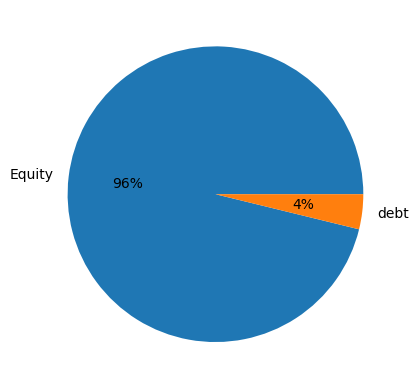

In [ ]:
plt.pie(x=df_pie["current_val"], labels=df_pie.index, autopct='%1.0f%%')

In [ ]:
df_pie = df_nav.groupby(by=df_nav['Type_L2']).sum()

In [ ]:
df_pie= df_pie[df_pie.current_val > 0]

([<matplotlib.patches.Wedge at 0x7e451deeece0>,
 [Text(0.9066580039038188, 0.6228733932005307, 'Contra'),
  Text(-0.06768661703500196, 1.0979155349453606, 'InternationalEq'),
  Text(-1.0838166557324007, 0.18799323593426134, 'LargeCap'),
  Text(-0.591444432567767, -0.9274661628246027, 'MidCap'),
  Text(-0.2918826030054226, -1.0605680299079259, 'MultiCap'),
  Text(0.49508488070370615, -0.982288634210229, 'SmallCap'),
  Text(1.0565892221497546, -0.3059725733411029, 'debt'),
  Text(1.0963949623380065, -0.08898363085332854, 'fundamental')],
 [Text(0.49454072940208293, 0.33974912356392584, '19%'),
  Text(-0.03691997292818289, 0.5988630190611057, '14%'),
  Text(-0.5911727213085821, 0.10254176505505162, '29%'),
  Text(-0.32260605412787285, -0.505890634267965, '8%'),
  Text(-0.15920869254841233, -0.5784916526770504, '1%'),
  Text(0.27004629856565787, -0.5357938004783067, '22%'),
  Text(0.5763213938998661, -0.16689413091332883, '4%'),
  Text(0.5980336158207308, -0.04853652591999738, '3%')])

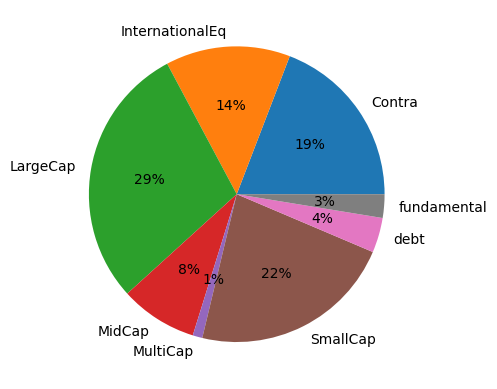

In [ ]:
plt.pie(x=df_pie["current_val"], labels=df_pie.index, autopct='%1.0f%%')

In [ ]:
df_pie = df_nav.groupby(by=df_nav['Type_L1']).sum()

In [ ]:
df_pie= df_pie[df_pie.current_val > 0]

([<matplotlib.patches.Wedge at 0x7e451a0741c0>,
 [Text(0.9066580039038188, 0.6228733932005307, 'ContraFunds'),
  Text(0.36023936707570164, 1.039339982108308, 'EquityFof'),
  Text(0.02548246180104578, 1.0997047986348691, 'InternationalEquityETF_Fof'),
  Text(-0.36571786066899137, 1.0374249112045153, 'InternationalEquityFof'),
  Text(-0.5178568970520248, 0.970476292433591, 'InternationalLargeCap'),
  Text(-1.0239502886759306, 0.40190273241230706, 'LargeCapETF'),
  Text(-0.9463077874628256, -0.5608043967259992, 'LargeCapIndex'),
  Text(-0.5970934562416752, -0.9238394906656517, 'MidCap'),
  Text(-0.3333879593365361, -1.048261641275412, 'MidCapIndex'),
  Text(0.19447486661245944, -1.0826724002467534, 'SmallCap'),
  Text(0.8477358813797329, -0.7009592537525471, 'SmallCapIndex'),
  Text(1.043881553708472, -0.34685919596745113, 'ValueOriented'),
  Text(1.0921015182697469, -0.1315837140109435, 'debt')],
 [Text(0.49454072940208293, 0.33974912356392584, '19%'),
  Text(0.19649420022310995, 0.56691

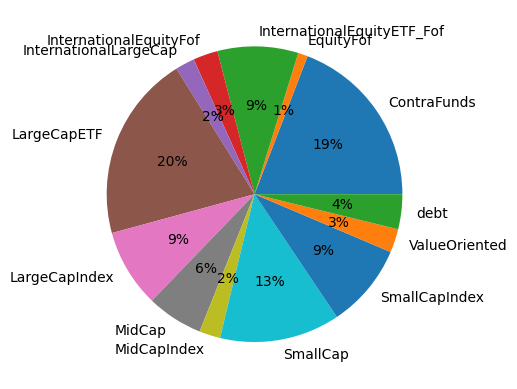

In [ ]:
plt.pie(x=df_pie["current_val"], labels=df_pie.index, autopct='%1.0f%%')

In [ ]:
df_pie = df_pie.reset_index()

In [ ]:
df_pie['dist']=df_pie.current_val / df_pie.current_val.sum()

In [ ]:
df_pie.sort_values(by='dist',ascending=False)

,Type_L1,Codes,quantity_avl,current_nav,current_val,dist
5,LargeCapETF,143903,20159.310,26.7955,540178.791105,0.203786
0,ContraFunds,119835,1487.033,341.5474,507892.254864,0.191606
9,SmallCap,531932,4402.925,457.1148,348500.716023,0.131474
10,SmallCapIndex,898080,15086.945,105.4092,243946.591102,0.092030
2,InternationalEquityETF_Fof,449486,15323.766,43.4114,233906.260989,0.088243
6,LargeCapIndex,1190226,14626.435,127.2210,226792.358496,0.085559
7,MidCap,367599,1183.323,503.1413,163050.195083,0.061512
12,debt,420767,8668.671,63.1034,101173.116885,0.038168
3,InternationalEquityFof,854680,5431.129,96.0303,71606.832824,0.027014
11,ValueOriented,596568,369.540,1486.9217,68329.296281,0.025778


In [ ]:
df[df.Type_L1=='LargeCapIndex']

,Codes,isin,Fund,Type_L1,Type_L2,Type_L3,Action,quantity,InvestedAmount,Date,cashflow
0,148703,INF789F1AUT5,uti nifty 200 momentum 30 index fund,LargeCapIndex,LargeCap,Equity,credit,2954.586,45000.0,2023-08-25,-45000.0
1,149800,INF247L01AV1,motilal oswal nifty 200 momentum 30 index fund,LargeCapIndex,LargeCap,Equity,credit,3529.491,39000.0,2023-08-25,-39000.0
2,150487,INF204KC1584,nippon india nifty alpha low volatility 30 ind...,LargeCapIndex,LargeCap,Equity,credit,2928.868,34000.0,2023-08-25,-34000.0
3,149881,INF789F1AVF2,uti s&p bse low volatility index fund,LargeCapIndex,LargeCap,Equity,credit,1498.986,19000.0,2023-08-25,-19000.0
4,149919,INF247L01AY5,motilal oswal s&p bse low volatility index fund,LargeCapIndex,LargeCap,Equity,credit,1110.280,14000.0,2023-08-25,-14000.0
5,141877,INF740KA1CR7,dsp nifty 50 equal weight index fund,LargeCapIndex,LargeCap,Equity,credit,798.376,15000.0,2023-08-25,-15000.0
6,149107,INF179KC1BM8,hdfc nifty50 equal weight index fund,LargeCapIndex,LargeCap,Equity,credit,862.465,11000.0,2023-08-25,-11000.0
7,150452,INF109KC11D8,icici prudential nifty 200 momentum 30 index fund,LargeCapIndex,LargeCap,Equity,credit,943.383,11424.0,2023-08-25,-11424.0


## BackDated XIRR

In [ ]:
def preprocess_transaction_df(df):
  cols = ['Codes', 'isin', 'Fund', 'Type_L1', 'Type_L2', 'Type_L3', 'Action', 'quantity', 'InvestedAmount', 'Date']
  df.rename(columns=lambda x: x.strip(), inplace=True)
  df['Type_L2'] = df.Type_L1.apply(lambda x : d1[x])
  df['Type_L3'] = df['Type_L2'].apply(lambda x : d2[x])
  df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
  df.sort_values(by='Date', inplace=True)
  df['cashflow'] = np.where(df['Action']=='credit',   df['InvestedAmount']*-1, df['InvestedAmount'])
  df['quantity'] = np.where(df['Action']=='debit',   df['quantity']*-1, df['quantity'])
  return df



In [ ]:
df = preprocess_transaction_df(pd.read_csv(f'{input_path}/MfTransactions.csv'))

In [ ]:
df.columns

Index(['Codes', 'amc', 'isin', 'Type_L1', 'Action', 'Fund', 'max_days',
       'sm_sharpe', 'sm_sortino', 'sm_cagr', 'weight', 'quantity',
       'InvestedAmount', 'Date', 'platform', 'Type_L2', 'Type_L3', 'cashflow'],
      dtype='object')

In [ ]:
def HistoricalNav(scheme_code_list, start_date, end_date):
  # Assert keyword is a debugging tool.
  # Below assert keyword check whehther the scheme_code_list is a list and it is present, if not it raises an assertion failure message.
  assert (isinstance(scheme_code_list, list) is True), "Arguement scheme_code_list should be a list"
  assert (isinstance(start_date, str) is True), "start_date must be a str in %d-%m-%Y format" # checks whether start date is present and is in correct format.
  assert (isinstance(end_date, str) is True), "end_date must be a str in %d-%m-%Y format" # checks whether end date is present and is in correct format

  main_df = pd.DataFrame(columns = ['date', 'nav']) #empty dataframe

  for schemes in scheme_code_list:
    print(schemes)
    hist = mf.get_scheme_historical_nav_for_dates(schemes, start_date, end_date)
    #print(hist)
    data = pd.DataFrame(hist['data'])
    data['date']= pd.to_datetime(data['date'], format='%d-%m-%Y')
    data.sort_values(by='date', inplace=True)
    data['Code'] = schemes
    data['Code'] = data['Code'].astype('int64')

    main_df = main_df.append(data) # appending the data in the main_df dataframe.

  return main_df #Returning the required Dataframe.

# from datetime import  timedelta
# import datetime
# days_to_subtract = 4
# end_date = datetime.date(2023, 12, 20)
# start_date= end_date-timedelta(days=days_to_subtract)
# start_date = start_date.strftime("%d-%m-%Y")
# end_date = end_date.strftime("%d-%m-%Y")

# print(start_date, end_date)

# HistoricalNav([149800, 148703],start_date, end_date)

In [ ]:
import datetime
todayDate = datetime.date.today()
firstOfMon = datetime.date(todayDate.year, todayDate.month, 1)
firstOfMon

datetime.date(2024, 1, 1)

In [ ]:
def get_back_dates(last_x):
  todayDate = datetime.date.today()
  #print(todayDate)
  years = [2024, 2023]
  months = np.arange(1,13)[::-1]
  all_dates = [[y,m, 1] for m in months for y in years]
  #print(len(all_dates))
  all_dates = [datetime.date(x[0], x[1], 1) for x in all_dates]
  filtered_dates = list(filter(lambda a: a < todayDate, all_dates))
  #print(filtered_dates)
  return filtered_dates[:last_x]

In [ ]:
last_x_dates = get_back_dates(6)

In [ ]:
# this is temporray
last_x_dates.insert(0, datetime.date(2024, 1, 1))

In [ ]:
max(last_x_dates)

datetime.date(2023, 12, 1)

In [ ]:
min(last_x_dates)

datetime.date(2023, 7, 1)

In [ ]:
last_x_dates.insert(0, datetime.date(2024, 1, 1))

In [ ]:
last_x_dates

[datetime.date(2024, 1, 1),
 datetime.date(2023, 12, 1),
 datetime.date(2023, 11, 1),
 datetime.date(2023, 10, 1),
 datetime.date(2023, 9, 1),
 datetime.date(2023, 8, 1),
 datetime.date(2023, 7, 1)]

In [ ]:
from datetime import  timedelta
import datetime
delta_days = 5
end_date =   (max(last_x_dates)+timedelta(days=delta_days)).lambd
start_date = (min(last_x_dates)-timedelta(days=delta_days)).strftime("%d-%m-%Y")
print(start_date, end_date)
main_df = HistoricalNav(df.Codes.unique().tolist(), start_date, end_date)

26-06-2023 06-01-2024
120828
125307
120841
127042
146130
147445
146196
120819
143903
119835
148928
118778
149219
149910
119716
150597
120700
149107
150452
141877
149919
149881
150487
149800
148703
150677
150892
148519
149283
148815
150751
148662
149389
150902
149894
126353
148726
149816
149892
149936
148807
150673
129188
149961
118494
120323
149243
118481
150822
120486
120702
118784


In [ ]:
main_df['Code'] = main_df['Code'].astype('Int64')


In [ ]:
main_df.dtypes

date    datetime64[ns]
nav             object
Code             Int64
dtype: object

In [ ]:
main_df.head()

,date,nav,Code
130,2023-06-26,169.89180,120828
129,2023-06-27,170.73800,120828
128,2023-06-28,170.74990,120828
127,2023-06-30,171.13390,120828
126,2023-07-03,172.96180,120828


In [ ]:
main_df.tail()

,date,nav,Code
4,2024-01-01,197.93770,118784
3,2024-01-02,197.23420,118784
2,2024-01-03,196.81940,118784
1,2024-01-04,198.79740,118784
0,2024-01-05,199.29240,118784


In [ ]:
global DT
def get_dt_nav(s):
  global DT
  #print(f'{int(s.Codes)}')
  #print("----------")
  if s.quantity_avl > 0:
    temp = main_df[main_df.Code==s.Codes]
    temp_d = temp[temp.date >= DT.strftime("%Y-%m-%d")]
    #print(temp_d)
    cnav =  float(temp_d['nav'].iloc[0])
    #print(float(cnav))
    #print(temp_d['date'].iloc[0])
    s['current_nav']= cnav
    #print(temp[temp.date >= dt.strftime("%Y-%m-%d")].loc[0, 'date'])
  else:
    s['current_nav'] = np.nan
    print(f'No quantity available for {int(s.Codes)}')
  return s

def get_xirr(df, dt):
  global DT
  DT = dt
  print(f'XIIR for DT {DT}')

  df.rename(columns=lambda x: x.strip(), inplace=True)
  df_nav = df.groupby(['Codes']).quantity.sum().to_frame('quantity_avl').reset_index()
  print (len(df_nav.Codes))
  #df_nav['current_nav'] = df_nav.apply(lambda x: float(mf.get_scheme_quote(str(int(x['Codes'])))['nav'])  if x['quantity_avl']>0 else None,  axis=1)
  df_nav = df_nav.apply(get_dt_nav, axis=1)
  df_nav = pd.merge(df_nav, df[['Codes', 'Type_L1']], on=['Codes'], how='outer')
  df_nav.drop_duplicates(inplace=True)
  df_nav['current_val'] = df_nav['quantity_avl'] * df_nav['current_nav']
  today_protfolio_val = round(df_nav.current_val.sum())
  #print(df_nav.head())
  dtype_dict = {'Codes': int, 'quantity': float, 'InvestedAmount': float, 'cashflow': float, 'isin': str, 'Type_L1': 'category', 'Action':  'category'}
  df = df.astype(dtype_dict)
  #print(df.head())
  s1 = df.Date.append(pd.to_datetime(pd.Series(DT.strftime('%Y-%m-%d')))).reset_index(drop=True)
  s2 = df.cashflow.append(pd.Series(today_protfolio_val)).reset_index(drop=True)
  #print(s1)
  #print(s2)
  overall_xirr = round(xirr(s1,s2), 2)
  t1 = s1[0].to_pydatetime().strftime("%d-%m-%Y")
  t2 = s1.iloc[-1].to_pydatetime().strftime("%d-%m-%Y")
  m = np.round((s1.iloc[-1] - s1[0]) / np.timedelta64(1, 'M'))
  print(f"over all xirr is : {overall_xirr*100} % in last {m} months from date {t1} to date {t2}")
  details = {'xirr' : [overall_xirr*100], 'investment duration(months)' : [m] , 'end_date' : [t2]}
  return pd.DataFrame.from_dict(details)


In [ ]:

def filter_df_dates(df,fd):
  df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
  #fd = '2023/12/20'
  fd = fd.strftime("%m/%d/%Y")
  temp = df.loc[(df['Date'] <= fd)]
  return temp



In [ ]:
df.sort_values(by=['Date'], ascending=True, inplace=True)

In [ ]:
last_x_dates

[datetime.date(2024, 1, 1),
 datetime.date(2023, 12, 1),
 datetime.date(2023, 11, 1),
 datetime.date(2023, 10, 1),
 datetime.date(2023, 9, 1),
 datetime.date(2023, 8, 1),
 datetime.date(2023, 7, 1)]

In [ ]:
all_xirr = pd.DataFrame(columns=['xirr', 'investment duration(months)', 'end_date'])
for dt in last_x_dates:
  temp = get_xirr(filter_df_dates(df, dt), dt)
  all_xirr = pd.concat([all_xirr, temp])

XIIR for DT 2024-01-01
52
No quantity available for 120819
No quantity available for 125307
No quantity available for 147445
over all xirr is : 46.0 % in last 21.0 months from date 24-03-2022 to date 01-01-2024
XIIR for DT 2023-12-01
52
No quantity available for 120819
No quantity available for 125307
No quantity available for 147445
over all xirr is : 38.0 % in last 20.0 months from date 24-03-2022 to date 01-12-2023
XIIR for DT 2023-11-01
44
No quantity available for 120819
No quantity available for 125307
No quantity available for 147445
over all xirr is : 20.0 % in last 19.0 months from date 24-03-2022 to date 01-11-2023
XIIR for DT 2023-10-01
30
No quantity available for 120819
No quantity available for 125307
No quantity available for 147445
over all xirr is : 31.0 % in last 18.0 months from date 24-03-2022 to date 01-10-2023
XIIR for DT 2023-09-01
25
No quantity available for 120819
No quantity available for 125307
No quantity available for 147445
over all xirr is : 32.0 % in la

In [ ]:
all_xirr

,xirr,investment duration(months),end_date
0,46.0,21.0,01-01-2024
0,38.0,20.0,01-12-2023
0,20.0,19.0,01-11-2023
0,31.0,18.0,01-10-2023
0,32.0,17.0,01-09-2023
0,34.0,16.0,01-08-2023
0,25.0,15.0,01-07-2023


In [ ]:
all_xirr['Nifty500_XIRR']= [16.98,13.16,8.39,11.26,10.95,11.56,9.15]
all_xirr['Nifty50_XIRR']= [14.03, 10.11, 6.26, 8.6, 8.75, 10.56, 8.88]

#IV :  -17222.75 @ 3/24/2022
#FV :   21,741.90  @ 01/01/2024

In [ ]:
all_xirr.rename(columns={'xirr' : 'My_Xirr'}, inplace=True)

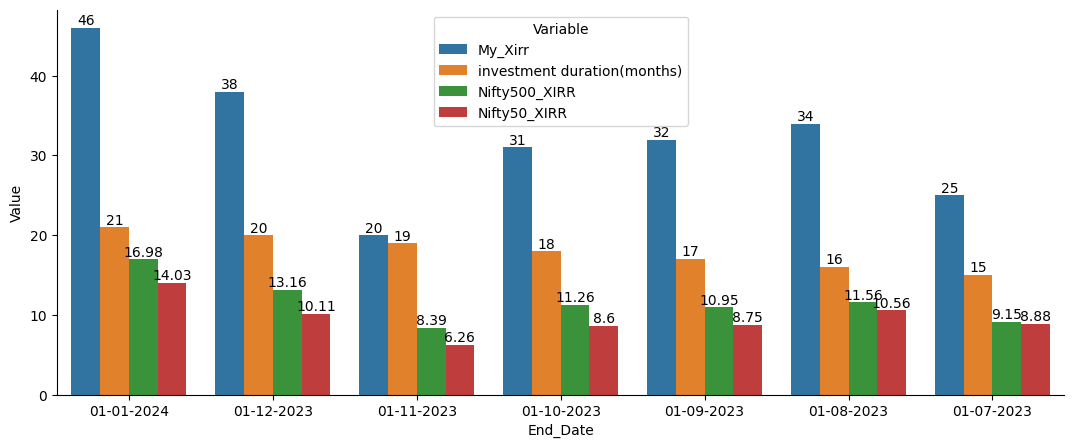

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(13, 5))
tidy = all_xirr.melt(id_vars='end_date').rename(columns=str.title)
ax = sns.barplot(x='End_Date', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])



sns.despine(fig)


In [ ]:
mf.get_scheme_quote('150518')

{'scheme_code': '150518',
 'scheme_name': 'Motilal Oswal S&P BSE Enhanced Value Index Fund-Direct plan',
 'last_updated': '18-Jan-2024',
 'nav': '19.7953'}

In [ ]:
mf.get_available_schemes('MOTILAL')

{'145834': 'Motilal Oswal Liquid Fund - Direct Growth',
 '145946': 'Motilal Oswal Liquid Fund - Regular Growth',
 '146218': 'Motilal Oswal Liquid Fund Direct - IDCW  Quarterly Payout/Reinvestment',
 '146226': 'Motilal Oswal Liquid Fund Direct - IDCW Fortnightly Reinvestment',
 '146223': 'Motilal Oswal Liquid Fund Direct - IDCW Monthly Payout/Reinvestment',
 '146228': 'Motilal Oswal Liquid Fund Direct - IDCW Reinvestment',
 '146229': 'Motilal Oswal Liquid Fund Direct - IDCW Weekly Reinvestment',
 '146227': 'Motilal Oswal Liquid Fund Regular - IDCW Daily Reinvestment',
 '146230': 'Motilal Oswal Liquid Fund Regular - IDCW Fortnightly Reinvestment',
 '146220': 'Motilal Oswal Liquid Fund Regular - IDCW Monthly Payout/Reinvestment',
 '146222': 'Motilal Oswal Liquid Fund Regular - IDCW Quarterly Payout/Reinvestment',
 '146224': 'Motilal Oswal Liquid Fund Regular - IDCW Weekly Reinvestment',
 '124234': 'Motilal Oswal Ultra Short Term Fund (MOFUSTF) -Direct Plan- Growth',
 '124233': 'Motilal Os